**Author:** Sydney Crandall

**Last Edited:** June 1st, 2022

In [1]:
# imports
import pandas as pd
import numpy as np
import cluster
import math
import munge
import datetime as dt
from metpy.units import units
import visualizations as vis
from scipy.stats import iqr
import matplotlib.pyplot as plt
import seaborn as sb
import gapstat as gs

In [2]:
# run functions from munge.py
trd = munge.from_raw("trinidadRaw.csv")
trd = munge.add_season_rearrange(trd)
trd = munge.replace_month_hour(trd)
trd = munge.wet_bulb(trd)
trdHourly = munge.to_hourly(trd)
trdDaily = munge.to_daily(trdHourly)

trdHourly.to_csv("trdHourly.csv")
trdDaily.to_csv("trdDaily.csv")

In [3]:
# run the functions from cluster.py
included_cols = ['drytemp_max', 'drytemp_min', 'dewtemp_avg','RH_max',
                 'RH_min', 'pres_max', 'pres_min', 'prec_inch',
                 'drytemp_max_hour', 'drytemp_min_hour', 'prec_max_hour']
trdData, trdScaledData = cluster.scale_and_convert_to_numpy(trdDaily, included_cols)

#init_centroids = cluster.plus_plus(albScaledData, 4)
k = 3
trdScaledCentroids, trdIdx = cluster.cluster_data(k, trdScaledData)

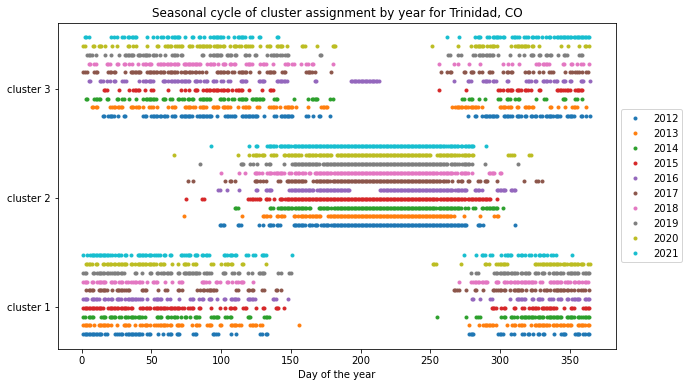

In [4]:
cluster_label_list = ["cluster 1", "cluster 2", "cluster 3", "cluster 4"]
vis.seasonal_assignment_by_year("Trinidad, CO", cluster_label_list[0:3], 3, trdDaily, trdIdx)

In [5]:
trdRaw = munge.from_raw("trinidadRaw.csv")
trdRaw.isnull().sum()

dewtemp_F     4332
drytemp_F     4176
prec_inch    22426
RH            4145
pres_mbar     3895
wetbulb_F     4291
wdir         10002
wgust_mph    91882
wspd_mph      5003
datetime         0
hour             0
month            0
dtype: int64

In [6]:
trdRaw.shape

(107709, 12)

In [7]:
trdDaily['cluster'] = trdIdx

In [8]:
trdDailyGroups = trdDaily.groupby('cluster')

In [9]:
trdDailyGroups.get_group(1).describe()

,tilt_season,drytemp_max,drytemp_min,dewtemp_avg,wetbulb_avg,RH_max,RH_min,pres_max,pres_min,wspd_max,wspd_min,wdir_avg,prec_inch,drytemp_max_hour,drytemp_min_hour,prec_max_hour,pres_max_hour,pres_min_hour,pres_tend,cluster
count,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000,1114.00000,1114.000000,1114.000000,1114.000000,1114.000000,1114.00000,1114.000000,1114.0
mean,1.990126,47.952423,22.733843,19.887793,28.883303,82.877022,36.793087,828.697937,821.928650,16.381956,1.168761,185.926392,0.02500,12.416517,7.958707,2.225314,10.456014,11.86535,-0.140934,1.0
std,1.209015,12.426025,10.252441,9.639828,8.475244,11.564360,19.742498,3.942261,4.394372,4.784505,1.969391,50.933567,0.08626,4.336967,8.013584,5.300362,8.687463,9.54056,7.481571,0.0
min,1.000000,9.500000,-16.000000,-11.000000,-4.000000,40.000000,2.000000,816.000000,802.000000,6.000000,0.000000,33.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,-17.000000,1.0
25%,1.000000,39.000000,16.500000,14.000000,24.000000,75.000000,21.000000,826.000000,819.000000,13.000000,0.000000,156.000000,0.00000,12.000000,3.000000,0.000000,0.000000,0.00000,-6.000000,1.0
50%,2.000000,50.000000,24.000000,20.000000,29.500000,85.000000,33.000000,829.000000,823.000000,16.000000,0.000000,196.000000,0.00000,13.000000,5.000000,0.000000,8.000000,13.00000,-3.500000,1.0
75%,2.000000,57.750000,30.000000,26.000000,35.000000,92.000000,49.000000,831.000000,825.000000,18.000000,3.000000,219.000000,0.00000,14.000000,12.000000,0.000000,20.000000,23.00000,6.000000,1.0
max,4.000000,74.000000,50.000000,50.000000,51.000000,100.000000,93.000000,844.000000,832.000000,44.000000,11.000000,337.000000,1.07000,23.000000,23.000000,23.000000,23.000000,23.00000,23.000000,1.0


In [10]:
trdDailyGroups.get_group(2).describe()

,tilt_season,drytemp_max,drytemp_min,dewtemp_avg,wetbulb_avg,RH_max,RH_min,pres_max,pres_min,wspd_max,wspd_min,wdir_avg,prec_inch,drytemp_max_hour,drytemp_min_hour,prec_max_hour,pres_max_hour,pres_min_hour,pres_tend,cluster
count,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.0
mean,3.143564,83.766266,55.064709,43.503536,54.669731,73.046326,22.121286,828.941284,824.406311,19.045969,1.352192,193.652756,0.030007,12.751768,5.746818,3.722772,8.958274,12.311881,-1.021216,2.0
std,0.614669,8.756479,7.877592,8.283522,5.471193,14.498188,11.761702,2.847218,3.003401,5.124629,2.058873,30.892960,0.105861,1.979347,6.581159,6.988988,8.951095,7.170330,4.776491,0.0
min,2.000000,54.000000,31.000000,16.000000,37.000000,31.500000,2.000000,820.000000,813.000000,8.000000,0.000000,75.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.000000,2.0
25%,3.000000,78.000000,50.000000,38.000000,51.000000,62.000000,14.000000,827.000000,822.500000,15.000000,0.000000,176.000000,0.000000,12.000000,3.000000,0.000000,0.000000,12.000000,-5.000000,2.0
50%,3.000000,85.000000,57.000000,45.000000,56.000000,74.000000,19.000000,829.000000,824.000000,18.000000,0.000000,196.000000,0.000000,13.000000,4.000000,0.000000,6.000000,14.000000,-3.000000,2.0
75%,4.000000,90.000000,61.000000,50.000000,59.000000,86.000000,27.000000,831.000000,826.500000,22.000000,3.000000,214.000000,0.000000,14.000000,5.000000,0.000000,20.000000,16.000000,4.000000,2.0
max,4.000000,102.000000,70.500000,60.000000,64.000000,100.000000,78.500000,840.000000,833.500000,40.000000,11.000000,290.000000,1.885000,23.000000,23.000000,23.000000,23.000000,23.000000,14.000000,2.0


In [11]:
trdDailyGroups.get_group(3).describe()

,tilt_season,drytemp_max,drytemp_min,dewtemp_avg,wetbulb_avg,RH_max,RH_min,pres_max,pres_min,wspd_max,wspd_min,wdir_avg,prec_inch,drytemp_max_hour,drytemp_min_hour,prec_max_hour,pres_max_hour,pres_min_hour,pres_tend,cluster
count,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.0
mean,2.205333,68.133781,35.815109,19.332445,38.139557,61.506222,13.965333,823.266235,816.113770,22.752890,2.411111,216.935104,0.002413,12.379556,10.833778,0.611556,11.613333,11.590222,0.742222,3.0
std,1.118260,12.159343,12.065024,8.737350,7.725793,16.641371,7.904165,3.542511,4.898799,7.490314,2.911366,33.708004,0.019758,2.802028,9.337194,3.256700,10.258527,6.770257,7.776185,0.0
min,1.000000,34.000000,6.000000,-13.000000,14.000000,13.000000,1.000000,811.000000,790.000000,9.000000,0.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-18.000000,3.0
25%,1.000000,60.000000,28.000000,14.000000,33.000000,50.000000,8.000000,821.000000,813.000000,17.000000,0.000000,197.000000,0.000000,12.000000,3.000000,0.000000,0.000000,9.000000,-6.000000,3.0
50%,2.000000,68.000000,34.000000,20.000000,38.000000,60.000000,13.000000,823.000000,817.000000,22.000000,0.000000,219.000000,0.000000,13.000000,5.000000,0.000000,8.000000,13.000000,2.000000,3.0
75%,3.000000,76.000000,42.500000,25.000000,43.000000,73.000000,17.000000,826.000000,820.000000,28.000000,5.000000,240.000000,0.000000,14.000000,23.000000,0.000000,23.000000,15.000000,7.000000,3.0
max,4.000000,101.000000,73.000000,47.000000,59.000000,100.000000,62.000000,835.000000,827.500000,54.000000,15.000000,310.000000,0.400000,16.000000,23.000000,23.000000,23.000000,23.000000,29.000000,3.0
